In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns


In [4]:
sf_data = pd.read_csv('C:/Users/armin/Desktop/TDI/airbnb_sanfrancisco.csv')
sf_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20201210194755,2020-12-11,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.95
1,5858,https://www.airbnb.com/rooms/5858,20201210194755,2020-12-11,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.79
2,7918,https://www.airbnb.com/rooms/7918,20201210194755,2020-12-11,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,8,0,8,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20201210194755,2020-12-11,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,8,0,8,0,0.10
4,8339,https://www.airbnb.com/rooms/8339,20201210194755,2020-12-10,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


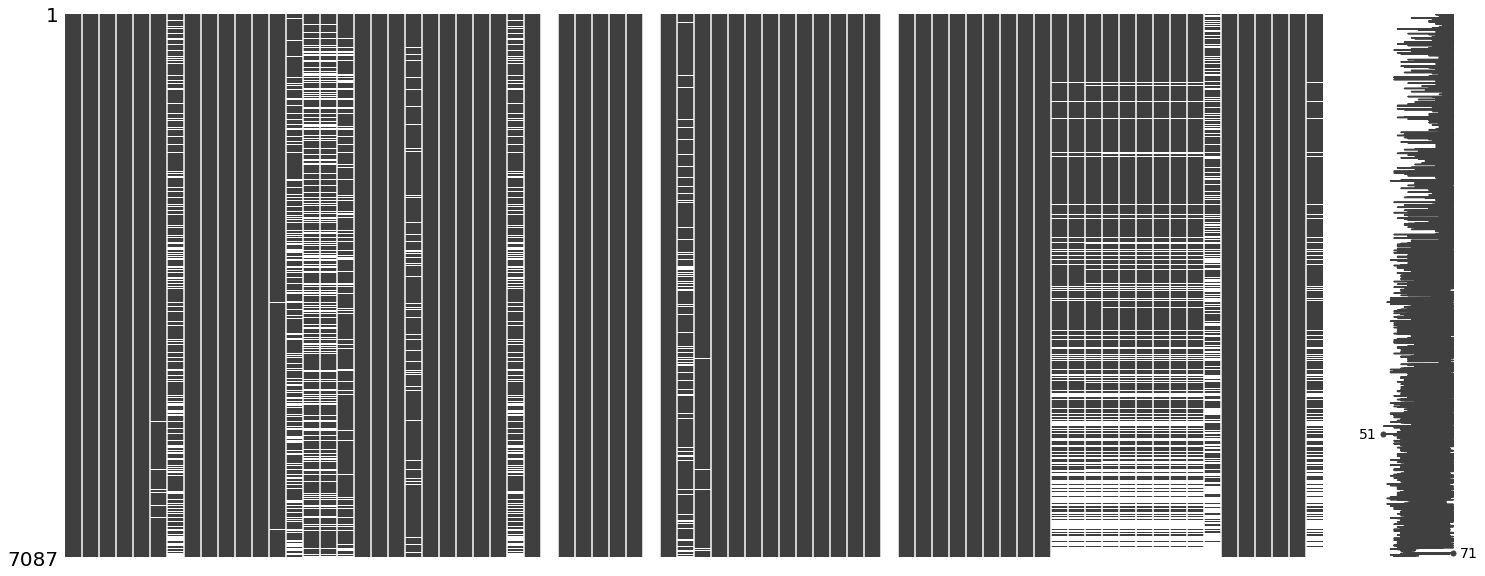

In [5]:
msno.matrix(sf_data)

In [12]:
sf_data.isna().sum().head(20)

id                                 0
listing_url                        0
scrape_id                          0
last_scraped                       0
name                               0
description                       65
neighborhood_overview           1955
picture_url                        0
host_id                            0
host_url                           0
host_name                          0
host_since                         0
host_location                      7
host_about                      1856
host_response_time              1973
host_response_rate              1973
host_acceptance_rate            1002
host_is_superhost                  0
host_thumbnail_url                 0
host_picture_url                   0
host_neighbourhood               469
host_listings_count                0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood                   1955
n

In [7]:
sf_data.shape

(7087, 74)

In [13]:
sf_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [20]:
sf_data.neighbourhood.isna().sum()

1955

In [22]:
revenue_sf = sf_data[['id','price','host_neighbourhood', 'number_of_reviews','minimum_nights', 'accommodates', 'host_name', 'host_id', 'neighbourhood_cleansed']]
revenue_sf

,id,price,host_neighbourhood,number_of_reviews,minimum_nights,accommodates,host_name,host_id,neighbourhood_cleansed
0,958,$146.00,Duboce Triangle,270,2,3,Holly,1169,Western Addition
1,5858,$235.00,Bernal Heights,111,30,5,Philip And Tania,8904,Bernal Heights
2,7918,$56.00,Cole Valley,19,32,2,Aaron,21994,Haight Ashbury
3,8142,$56.00,Cole Valley,8,32,2,Aaron,21994,Haight Ashbury
4,8339,$768.00,Alamo Square,28,5,4,Rosy,24215,Western Addition
...,...,...,...,...,...,...,...,...,...
7082,46896324,$125.00,Irvine,0,30,4,Brett,46319458,Pacific Heights
7083,46899977,$325.00,Western Addition,0,3,4,Varendra,4276210,Haight Ashbury
7084,46903678,$66.00,San Mateo,0,30,2,Helen,278218564,Outer Sunset
7085,46921256,$64.00,West of Twin Peaks,0,30,1,Mirjana,87156,West of Twin Peaks
